# Numerical work for: On the instability of a uniform electric field in pure non-Abelian Yang-Mills theory. 
## Authors: Carlos Cardona and Tanmay Vachaspati

In [66]:
import numpy as np
from scipy.integrate import odeint, simps, dblquad
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import timeit
from mpl_toolkits import mplot3d
import json
from scipy import integrate
from numba import jit
import time
import multiprocess as mp
from multiprocessing import Pool

# $\phi$ Solutions and integration

${\phi}''+(p+{\mu^2\over 2}t u)^2\phi=0$ with real initial conditions $\phi_r(t=0)=0,\quad \phi_r'(t=0)={p\over 2}\left(L\over 2\pi\right)^{3/2}$, and imaginary initial conditions $\phi_i(t=0)=-{1\over 2}\left(L\over 2\pi\right)^{3/2},\quad \phi_i'(t=0)=0$. In order to use odeint, we need to convert it to a first order: 
$z=\phi'\rightarrow$ $z'+(p+{\mu^2\over 2}t u)^2\phi=0$ with initial real initial conditions $\phi_r(t=0)=0,\quad z_r(t=0)={p\over 2}\left(L\over 2\pi\right)^{3/2}$ and imaginary initial conditions $\phi_i(t=0)=-{1\over 2}\left(L\over 2\pi\right)^{3/2},\quad z_r(t=0)=0$

In [67]:
npts=300
t=np.linspace(0,30,npts)
ps =np.linspace(0,60,npts)
us= np.linspace(0,1,npts)
num_processes = 4


L=2*np.pi
initc=L**(3/2)/(2*np.pi)**(3/2)
mu2=1
#m=1

@jit
def modelphiplus(y, t,p,u):
    return [-(p+(mu2/2)*t*u)**2*y[1],y[0]]
@jit
def modelphiminus(y,t,p,u):
    return [-(p-(mu2/2)*t*u)**2*y[1],y[0]]

# Paralize solutions
def solphiRpluspu(u):
# defining the solution as a function of initial conditions
    def srp(p):
        y0 = [0.5*p*initc, 0]
        sol=odeint(modelphiplus, y0 , t,args=(p,u))
        return sol
    pool = mp.Pool(num_processes)
    mp_solutions = pool.map(srp, ps)
    return mp_solutions


def solphiIpluspu(u):
# defining the solution as a function of initial conditions
    def srp(p):
        y0 = [0, -0.5*initc]
        sol=odeint(modelphiplus, y0 , t,args=(p,u))
        return sol
    pool = mp.Pool(num_processes)
    mp_solutions = pool.map(srp, ps)
    return mp_solutions

def solphiRminuspu(u):
# defining the solution as a function of initial conditions
    def srp(p):
        y0 = [0.5*p*initc, 0]
        sol=odeint(modelphiminus, y0 , t,args=(p,u))
        return sol
    pool = mp.Pool(num_processes)
    mp_solutions = pool.map(srp, ps)
    return mp_solutions

def solphiIminuspu(u):
# defining the solution as a function of initial conditions
    def srp(p):
        y0 = [0, -0.5*initc]
        sol=odeint(modelphiminus, y0 , t,args=(p,u))
        return sol
    pool = mp.Pool(num_processes)
    mp_solutions = pool.map(srp, ps)
    return mp_solutions

st=len(t)/t[-1]
sp=len(ps)/ps[-1]
su=len(us)/us[-1]

@jit
def timeindex(time):
    return int(st*time)
@jit
def pindex(p):
    return int(sp*p)

@jit
def uindex(u):
    return int(su*u)



# $\psi$ Solutions
${\psi}''+\left((p u\pm{\mu^2\over 2}t )^2+p^2(1-u^2)+m^2\right)\psi=0$ with initial real conditions $\psi_r(t=0)=0,\quad \psi_r'(t=0)={p\over 2}\left(L\over 2\pi\right)^{3/2}$, and imaginary initial conditions $\psi_i(t=0)=-{1\over 2}\left(L\over 2\pi\right)^{3/2},\quad \psi_i'(t=0)=0$. In order to use odeint, we need to convert it to a first order: 
$z=\psi'\rightarrow$ $z'+\left((p u\pm{\mu^2\over 2}t )^2+p^2(1-u^2)+m^2\right)\psi=0$ with initial real initial conditions $\psi_r(t=0)=0,\quad z_r(t=0)={p\over 2}\left(L\over 2\pi\right)^{3/2}$ and imaginary initial conditions $\psi_i(t=0)=-{1\over 2}\left(L\over 2\pi\right)^{3/2},\quad z_r(t=0)=0$

In [68]:

@jit
def modelpsiplus(y, t,p,u):
    return [-((p*u+(mu2/2)*t)**2 + p**2*(1-u**2)+m**2)*y[1],y[0]]
@jit
def modelpsiminus(y,t,p,u):
    return [-((p*u-(mu2/2)*t)**2 + p**2*(1-u**2)+m**2)*y[1],y[0]]

# Paralize solutions
def solpsiRpluspu(u):
# defining the solution as a function of initial conditions
    def srp(p):
        y0 = [0.5*p*initc, 0]
        sol=odeint(modelpsiplus, y0 , t,args=(p,u))
        return sol
    pool = mp.Pool(num_processes)
    mp_solutions = pool.map(srp, ps)
    return mp_solutions

# Serialize solutions
def solpsiRpluspuS(u):
# defining the solution as a function of initial conditions
    def srp(p):
        y0 = [0.5*p*initc, 0]
        sol=odeint(modelpsiplus, y0 , t,args=(p,u))
        return sol
    serial_solutions =[srp(p) for p in ps]
    return serial_solutions

def solpsiIpluspu(u):
# defining the solution as a function of initial conditions
    def srp(p):
        y0 = [0, -0.5*initc]
        sol=odeint(modelpsiplus, y0 , t,args=(p,u))
        return sol
    pool = mp.Pool(num_processes)
    mp_solutions = pool.map(srp, ps)
    return mp_solutions

def solpsiRminuspu(u):
# defining the solution as a function of initial conditions
    def srp(p):
        y0 = [0.5*p*initc, 0]
        sol=odeint(modelpsiminus, y0 , t,args=(p,u))
        return sol
    pool = mp.Pool(num_processes)
    mp_solutions = pool.map(srp, ps)
    return mp_solutions

def solpsiIminuspu(u):
# defining the solution as a function of initial conditions
    def srp(p):
        y0 = [0, -0.5*initc]
        sol=odeint(modelpsiminus, y0 , t,args=(p,u))
        return sol
    pool = mp.Pool(num_processes)
    mp_solutions = pool.map(srp, ps)
    return mp_solutions

st=len(t)/t[-1]
sp=len(ps)/ps[-1]
su=len(us)/us[-1]

@jit
def timeindex(time):
    return int(st*time)
@jit
def pindex(p):
    return int(sp*p)

@jit
def uindex(u):
    return int(su*u)


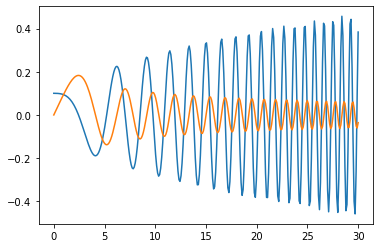

In [27]:
plt.plot(t,solphiRpluspu(1/2)[1])
plt.show()


### Since we dont want to recompute the solutions every time we want to use them to compute a particular observable, here we storage all the solutions as functions of u

In [11]:
phirp=np.array([solphiRpluspu(u) for u in us])
phiip=np.array([solphiIpluspu(u) for u in us])
phirm=np.array([solphiRminuspu(u) for u in us])
phiim=np.array([solphiIminuspu(u) for u in us])

In [69]:
m=0
#Making a table for u values using the serialized solutions
psirp=np.array([solpsiRpluspu(u) for u in us])
psiip=np.array([solpsiIpluspu(u) for u in us])
psirm=np.array([solpsiRminuspu(u) for u in us])
psiim=np.array([solpsiIminuspu(u) for u in us])


In [70]:
np.save('phirp_p0to60_300pts_t30.npy', phirp) 
np.save('phiip_p0to60_300pts_t30.npy', phiip) 
np.save('phirm_p0to60_300pts_t30.npy', phirm) 
np.save('phiim_p0to60_300pts_t30.npy', phiim) 

np.save('psirp_p0to60_300pts_t30.npy', psirp) 
np.save('psirp_p0to60_300pts_t30.npy', psiip) 
np.save('psirp_p0to60_300pts_t30.npy', psirm) 
np.save('psirp_p0to60_300pts_t30.npy', psiim) 

### Here we define de conbinations requiered to ge rip of the ground energy

In [72]:
#Here p and u denote index in us and ps. In other words, the values for the u and p here 
# corresponds to the real u and p via us[u] and ps[p] with u and p the ones in here
def chiphiRplus(p,u):
    return phirp[u][p][:,0]+np.abs(ps[p]+(mu2/2)*t*us[u])*phiip[u][p][:,1] 

def chiphiIplus(p,u):
    return phiip[u][p][:,0]-np.abs(ps[p]+(mu2/2)*t*us[u])*phirp[u][p][:,1]

def chiphiRminus(p,u):
    return phirm[u][p][:,0]+np.abs(ps[p]-(mu2/2)*t*us[u])*phiim[u][p][:,1]

def chiphiIminus(p,u):
    return phiim[u][p][:,0]-np.abs(ps[p]-(mu2/2)*t*us[u])*phirm[u][p][:,1]



def chipsiRplus(p,u):
    return psirp[u][p][:,0]+np.sqrt((ps[p]*us[u]+mu2*t/2)**2+ps[p]**2*(1-us[u]**2)+m**2)*psiip[u][p][:,1] 

def chipsiIplus(p,u):
    return psiip[u][p][:,0]-np.sqrt((ps[p]*us[u]+mu2*t/2)**2+ps[p]**2*(1-us[u]**2)+m**2)*psirp[u][p][:,1]

def chipsiRminus(p,u):
    return psirm[u][p][:,0]+np.sqrt((ps[p]*us[u]-mu2*t/2)**2+ps[p]**2*(1-us[u]**2)+m**2)*psiim[u][p][:,1]

def chipsiIminus(p,u):
    return psiim[u][p][:,0]-np.sqrt((ps[p]*us[u]-mu2*t/2)**2+ps[p]**2*(1-us[u]**2)+m**2)*psirm[u][p][:,1]

def NOrdHChiphi(p, u):
    return 8*np.pi*ps[p]*(chiphiRplus(p, u)**2+chiphiIplus(p, u)**2
                         +chiphiRminus(p, u)**2+chiphiIminus(p, u)**2)


def NOrdHChipsi(p, u):
    return 8*np.pi*ps[p]*(chipsiRplus(p, u)**2+chipsiIplus(p, u)**2
                         +chipsiRminus(p, u)**2+chipsiIminus(p, u)**2)

#def NumberDensity(p, u):
#    return 8*np.pi*ps[p]*((chiRplus(p, u)**2+chiIplus( p, u)**2)/np.sqrt((ps[p]*us[u]+mu2*t/2)**2+ps[p]**2*(1-us[u]**2)+m**2)
 #                        +(chiRminus( p, u)**2+chiIminus( p, u)**2)/np.sqrt((ps[p]*us[u]-mu2*t/2)**2+ps[p]**2*(1-us[u]**2)+m**2))

#### Plotting this solutions already suggest that the energy drops for large p:

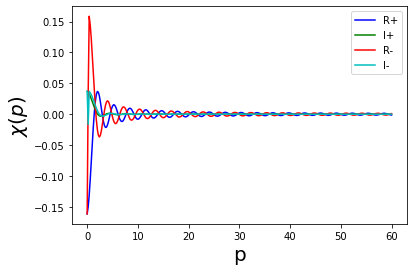

In [48]:
plt.plot(ps, [chiphiRplus(p,100)[timeindex(2)] for p in range(len(ps))],'b-', label='R+')
plt.plot(ps, [chiphiIplus(p,100)[timeindex(2)] for p in range(len(ps))],'g-', label='I+')
plt.plot(ps, [chiphiRminus(p,100)[timeindex(2)] for p in range(len(ps))],'r-', label='R-')
plt.plot(ps, [chiphiIminus(p,100)[timeindex(2)] for p in range(len(ps))],'c-', label='I-')
plt.xlabel('p', fontsize=20)
plt.ylabel('$\chi(p)$', fontsize=20)
plt.legend(loc='best')

plt.show()

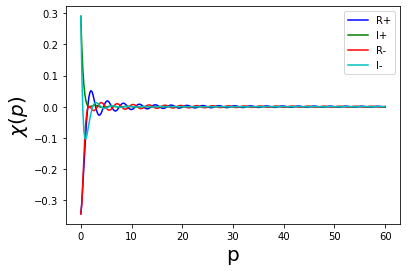

In [73]:
plt.plot(ps, [chipsiRplus(p,100)[timeindex(2)] for p in range(len(ps))],'b-', label='R+')
plt.plot(ps, [chipsiIplus(p,100)[timeindex(2)] for p in range(len(ps))],'g-', label='I+')
plt.plot(ps, [chipsiRminus(p,100)[timeindex(2)] for p in range(len(ps))],'r-', label='R-')
plt.plot(ps, [chipsiIminus(p,100)[timeindex(2)] for p in range(len(ps))],'c-', label='I-')
plt.xlabel('p', fontsize=20)
plt.ylabel('$\chi(p)$', fontsize=20)
plt.legend(loc='best')
plt.show()

### We now plot the normal order hamiltonian for both sectors $\phi$ and $\psi$ for fixed $u$ and as a function of $p$

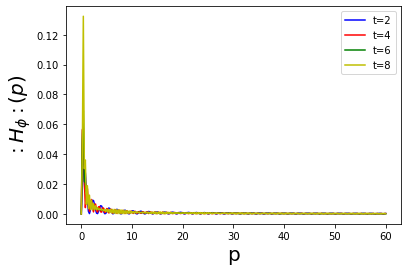

In [35]:
#plt.plot(ps, [chiRplus(p,1/2)[timeindex(2)] for p in range(len(ps))],'b-', label='R+')
plt.plot(ps, [NOrdHChiphi(p, 25)[timeindex(2)]  for p in range(len(ps))],'b-', label='t=2')
plt.plot(ps, [NOrdHChiphi(p, 25)[timeindex(4)]  for p in range(len(ps))],'r-',label='t=4')
plt.plot(ps, [NOrdHChiphi(p, 25)[timeindex(6)]  for p in range(len(ps))],'g-',label='t=6')
plt.plot(ps, [NOrdHChiphi(p, 25)[timeindex(8)]  for p in range(len(ps))],'y-',label='t=8')
plt.xlabel('p', fontsize=20)
plt.ylabel('$:H_{\phi}:(p)$', fontsize=20)
plt.legend(loc='best')
plt.show()

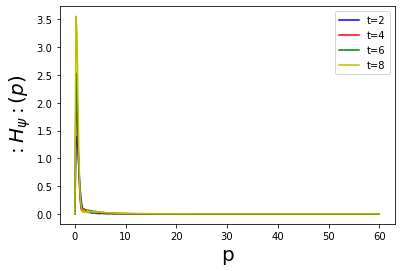

In [74]:
#plt.plot(ps, [chiRplus(p,1/2)[timeindex(2)] for p in range(len(ps))],'b-', label='R+')
plt.plot(ps, [NOrdHChipsi(p, 25)[timeindex(2)]  for p in range(len(ps))],'b-', label='t=2')
plt.plot(ps, [NOrdHChipsi(p, 25)[timeindex(4)]  for p in range(len(ps))],'r-',label='t=4')
plt.plot(ps, [NOrdHChipsi(p, 25)[timeindex(6)]  for p in range(len(ps))],'g-',label='t=6')
plt.plot(ps, [NOrdHChipsi(p, 25)[timeindex(8)]  for p in range(len(ps))],'y-',label='t=8')
plt.xlabel('p', fontsize=20)
plt.ylabel('$:H_{\psi}:(p)$', fontsize=20)
plt.legend(loc='best')
plt.show()

# Here we defined a simple class integrator to facilitate the integration later. 

In [75]:
import numpy as np
from numpy import sin, exp
from scipy.integrate import quad, odeint, simps, trapz
#import tqdm 
import time

class Integrate:
    def __init__(self, function):
        self.function = function
        self.error = 0
        self.sign = 1
        
    def double_integral(self, pps, uus):
        start = time.perf_counter()
        integral = 0
        sub_sum = 0
        super_sum = 0
        delta_x = pps[2] - pps[1]
        delta_y = uus[2] - uus[1]
        delta_area = delta_x * delta_y
        for i in range(len(pps)-1):
            for j in range(len(us)-1):
                try:
                    f1 = self.function(i, j)
                    sub_vol = f1 * delta_area
                    f2 = self.function(i + 1,j + 1)
                    super_vol = f2 * delta_area
                    vol = delta_area*(f1+f2)/2
                    integral += vol
                    sub_vol += sub_vol
                    super_vol += super_vol
                except ZeroDivisionError:
                    print(f"\nAvoided pole\n")
        finish= time.perf_counter()
        resu=[integral, super_vol - sub_vol, round(finish-start, 2)]
        return resu

## Now we integrate the normal order hamiltonians

In [39]:
integralNordHChi = Integrate(NOrdHChiphi)
result=integralNordHChi.double_integral(ps, us)

In [76]:
integralNordHChipsi = Integrate(NOrdHChipsi)
result2=integralNordHChipsi.double_integral(ps, us)

### Now we plot the integration results independently

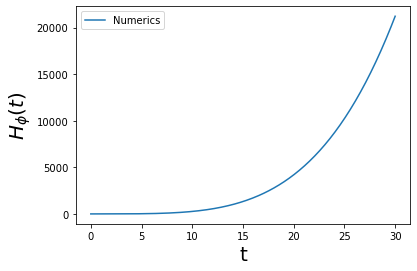

In [43]:
plt.plot(t, result[0], label='Numerics')
plt.xlabel('t', fontsize=20)
plt.ylabel('$H_{\phi}(t)$', fontsize=20)
plt.legend(loc='best')
plt.show()

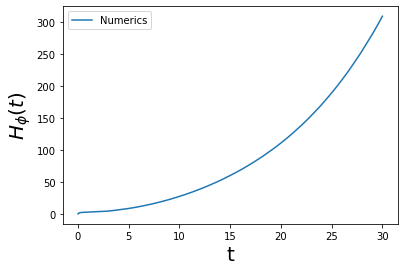

In [77]:
plt.plot(t, result2[0], label='Numerics')
plt.xlabel('t', fontsize=20)
plt.ylabel('$H_{\phi}(t)$', fontsize=20)
plt.legend(loc='best')
plt.show()